# Breast Cancer with PCA

## Import Library 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from warnings import filterwarnings
filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from jcopml.pipeline import num_pipe, cat_pipe
from jcopml.utils import save_model, load_model
from jcopml.plot import plot_missing_value
from jcopml.feature_importance import mean_score_decrease, mean_loss_decrease

## Import Data

In [2]:
pd.options.display.max_columns = 40

In [3]:
df = pd.read_csv("data/breast_cancer.csv")
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [4]:
df.shape

(569, 31)

Data terdiri dari 569 baris dan 31 kolom.

In [5]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

Tipe data telah sesuai.

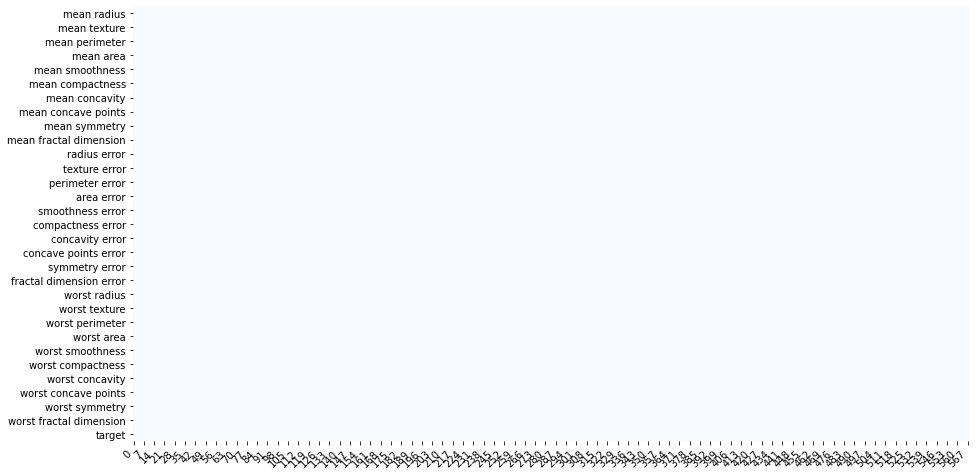

In [6]:
plot_missing_value(df)

Data telah bersih.

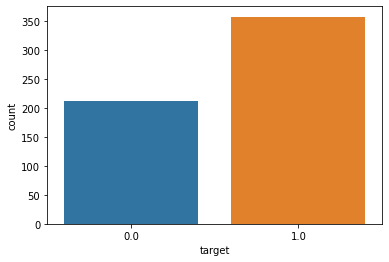

In [7]:
sns.countplot(df.target);

Target variabel balanced.

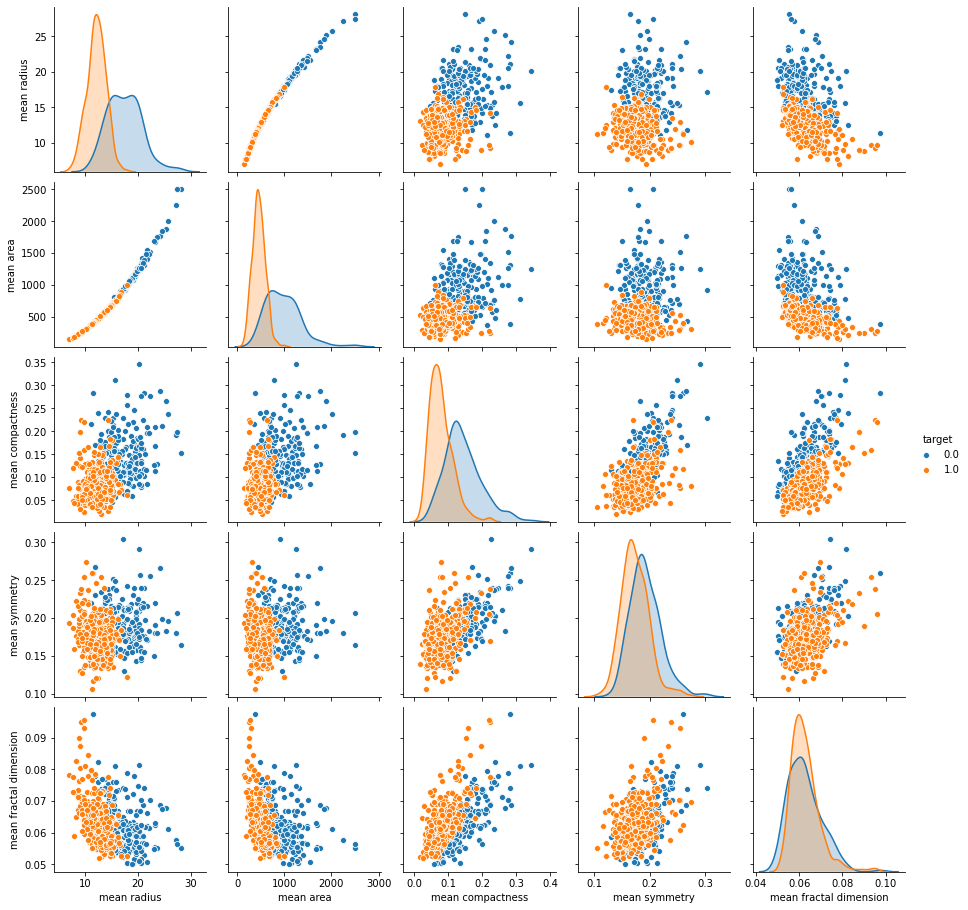

In [8]:
sns.pairplot(df, hue='target', vars=['mean radius','mean area','mean compactness','mean symmetry',
            'mean fractal dimension']);

Kalo kita lihat pada pairplot di atas data-data kita sudah seperti terpisah bahkan ada yang berkorelasi. Maka dari itu saya rasa perlu mereduksi dimensi data agar fitur-fitur yang berkorelasi dapat digabungkan/kombinasikan.

## Dataset Splitting

In [9]:
X = df.drop(columns="target")
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

## Modeling 

In [10]:
from sklearn.model_selection import GridSearchCV
from jcopml.tuning import grid_search_params as gsp
from sklearn.svm import SVC

In [11]:
gsp.svm_params

{'algo__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
 'algo__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])}

In [12]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
546,10.32,16.35,65.31,324.9,0.09434,0.04994,0.01012,0.005495,0.1885,0.06201,0.2104,0.9670,1.356,12.97,0.007086,0.007247,0.01012,0.005495,0.01560,0.002606,11.25,21.77,71.12,384.9,0.1285,0.08842,0.04384,0.02381,0.2681,0.07399
432,20.18,19.54,133.80,1250.0,0.11330,0.14890,0.21330,0.125900,0.1724,0.06053,0.4331,1.0010,3.008,52.49,0.009087,0.027150,0.05546,0.019100,0.02451,0.004005,22.03,25.07,146.00,1479.0,0.1665,0.29420,0.53080,0.21730,0.3032,0.08075
174,10.66,15.15,67.49,349.6,0.08792,0.04302,0.00000,0.000000,0.1928,0.05975,0.3309,1.9250,2.155,21.98,0.008713,0.010170,0.00000,0.000000,0.03265,0.001002,11.54,19.20,73.20,408.3,0.1076,0.06791,0.00000,0.00000,0.2710,0.06164
221,13.56,13.90,88.59,561.3,0.10510,0.11920,0.07860,0.044510,0.1962,0.06303,0.2569,0.4981,2.011,21.03,0.005851,0.023140,0.02544,0.008360,0.01842,0.002918,14.98,17.13,101.10,686.6,0.1376,0.26980,0.25770,0.09090,0.3065,0.08177
289,11.37,18.89,72.17,396.0,0.08713,0.05008,0.02399,0.021730,0.2013,0.05955,0.2656,1.9740,1.954,17.49,0.006538,0.013950,0.01376,0.009924,0.03416,0.002928,12.36,26.14,79.29,459.3,0.1118,0.09708,0.07529,0.06203,0.3267,0.06994


In [13]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), list(X_train.columns)),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC(max_iter=500))
])


model = GridSearchCV(pipeline, gsp.svm_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s


{'algo__C': 10.0, 'algo__gamma': 0.01}
0.9868131868131869 0.9802197802197803 0.9824561403508771


[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:   11.5s finished


Wow, skor yang mendekati sempurna namun, saya tidak kaget karena datanya memang bagus. Selanjutnya saya akan mencoba mereduksi dimensi agar fitur lebih sedikit dengan skor yang tidak begitu berbeda jauh.

# Dimensionality Reduction with Principal Component Analysis (PCA)

## Menentukan n_components dengan cumulative explained variance ratio 

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA().fit(X_train)

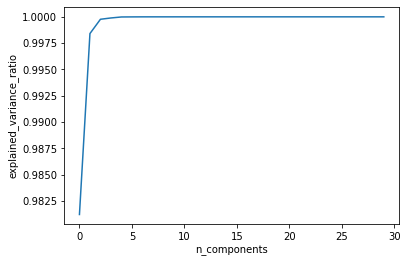

In [16]:
plt.plot(pca.explained_variance_ratio_.cumsum())
plt.xlabel('n_components')
plt.ylabel('explained_variance_ratio');

## Modeling dengan n_components hasil PCA

In [17]:
preprocessor = ColumnTransformer([
    ('numeric', num_pipe(scaling='standard'), list(X_train.columns)),
])


pipeline = Pipeline([
    ('prep', preprocessor),
    ('pca', PCA(n_components=15, whiten=True)),
    ('algo', SVC(max_iter=500))
])


model = GridSearchCV(pipeline, gsp.svm_params, cv=5, n_jobs=-1, verbose=1)
model.fit(X_train, y_train)

print(model.best_params_)
print(model.score(X_train, y_train), model.best_score_, model.score(X_test, y_test))

Fitting 5 folds for each of 49 candidates, totalling 245 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    3.0s


{'algo__C': 1000.0, 'algo__gamma': 0.001}
0.9868131868131869 0.9758241758241759 0.9736842105263158


[Parallel(n_jobs=-1)]: Done 245 out of 245 | elapsed:    5.5s finished


Dapat dilihat bahwa dengan fitur yang lebih sedikit kita berhasil mendekati hasil dari model yang menggunakan seluruh fitur.

## Save Model

In [18]:
save_model(model.best_estimator_, "breast_cancer.pkl")

Model is pickled as model/breast_cancer.pkl
